In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns

In [4]:
data_0 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/실험 데이터/좌우.csv')

In [5]:
data_set_0 = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/실험 데이터/좌우1.csv',
                         names=['time','A','B','C','D','A-B','C-D','A-120Hz','A-180Hz','b-60Hz','B-120Hz','B-180Hz','C-60Hz',
                        'C-120Hz','C-180Hz','C-60Hz','D-120Hz','D-180Hz','D-60Hz','discrimination','A-180-120','B-180-120','C-180-120',
                               'D-180-120','A-ave','B-ave','C-ave','D-ave','A-deviation','B-deviation','C-deviation','D-deviation',
                               'initialize','first index','threshold'])

C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [6]:
data_set_0.head()

,time,A,B,C,D,A-B,C-D,A-120Hz,A-180Hz,b-60Hz,...,B-ave,C-ave,D-ave,A-deviation,B-deviation,C-deviation,D-deviation,initialize,first index,threshold
0,0.000,-0.000071,-0.000071,-0.000071,-0.000071,-1.500000e-07,6.750000e-07,0.326618,0.225141,4.490702,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,73.0,0.0
1,0.001,-0.000489,-0.000488,-0.000486,-0.000491,-9.560000e-07,4.380000e-06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.002,-0.001708,-0.001705,-0.001699,-0.001714,-3.200000e-06,1.450000e-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.003,-0.004193,-0.004185,-0.004172,-0.004206,-7.660000e-06,3.380000e-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.004,-0.008344,-0.008324,-0.008263,-0.008302,-1.910000e-05,3.860000e-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


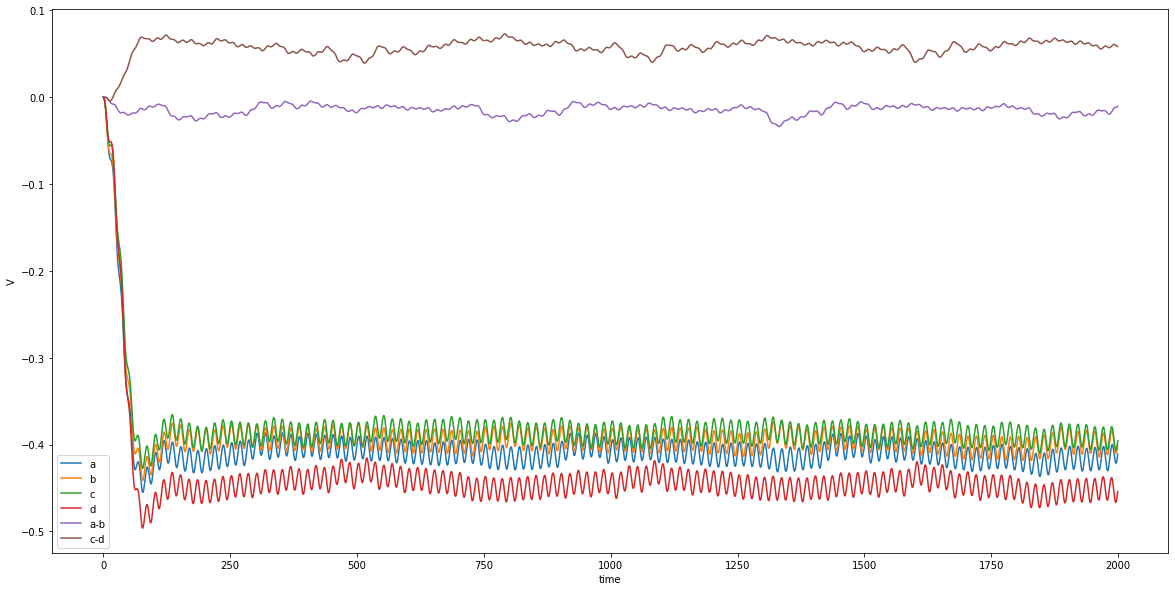

In [8]:
plt.figure(figsize=(20,10))
plt.plot(data_set_0.iloc[0:2000,1],label='a')  #data_set_1.plot()  works too
plt.plot(data_set_0.iloc[0:2000,2],label='b')
plt.plot(data_set_0.iloc[0:2000,3],label='c')
plt.plot(data_set_0.iloc[0:2000,4],label='d')
plt.plot(data_set_0.iloc[0:2000,5],label='a-b')
plt.plot(data_set_0.iloc[0:2000,6],label='c-d')
plt.xlabel('time')
plt.ylabel('V')
plt.legend()
plt.show()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

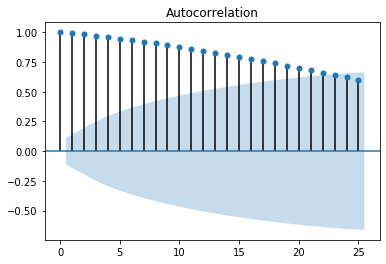

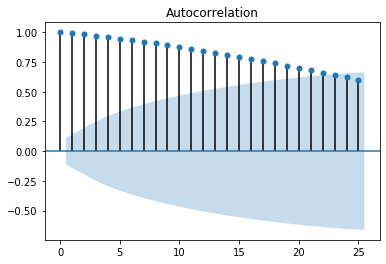

In [12]:
plot_acf(data_ARIMA_cut_float)

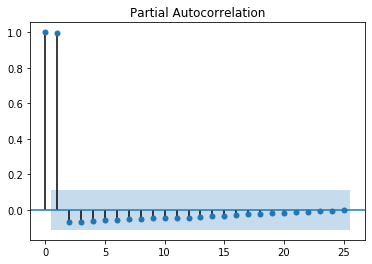

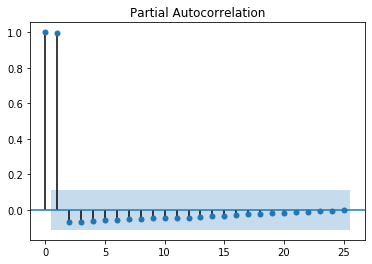

In [13]:
plot_pacf(data_ARIMA_cut_float)

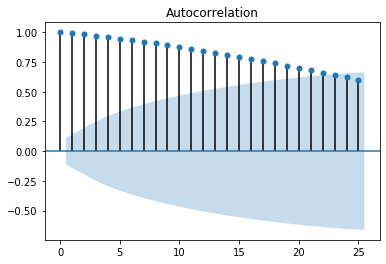

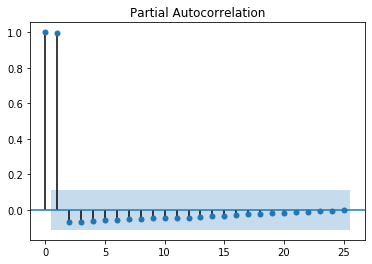

<Figure size 1440x288 with 0 Axes>

In [15]:
plot_acf(data_ARIMA_cut_float)
plot_pacf(data_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

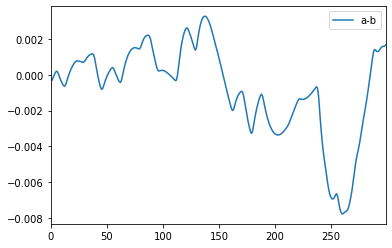

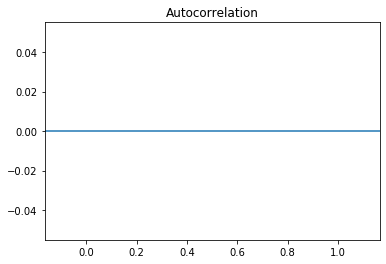

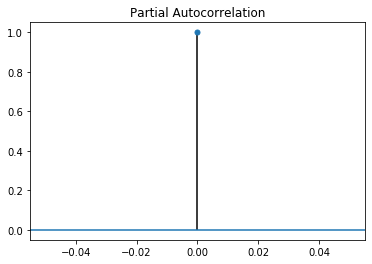

In [16]:
diff = data_ARIMA_cut_float.diff(periods=1)
diff.plot()
plot_acf(diff)
plot_pacf(diff)
plt.show()

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(data_ARIMA_cut_float, order=(1,1,0))
model_fit = model.fit(trend='c', full_output = True, disp=1)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                  D.a-b   No. Observations:                  299
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2083.614
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 29 Feb 2020   AIC                          -4161.227
Time:                        03:37:34   BIC                          -4150.126
Sample:                             1   HQIC                         -4156.784
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.578e-05      0.002      0.015      0.988      -0.003       0.003
ar.L1.D.a-b     0.9949      0.004    242.897      0.000       0.987       1.003
                                    Roots       

In [21]:
#위에랑 다른점 trend = nc로
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(data_ARIMA_cut_float, order=(1,1,0))
model_fit = model.fit(trend='nc', full_output = True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.a-b   No. Observations:                  299
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2083.613
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 29 Feb 2020   AIC                          -4163.227
Time:                        03:38:00   BIC                          -4155.826
Sample:                             1   HQIC                         -4160.265
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.a-b     0.9948      0.004    245.989      0.000       0.987       1.003
                                    Roots                                    
                  Real          Imaginary         

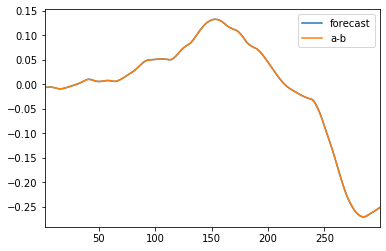

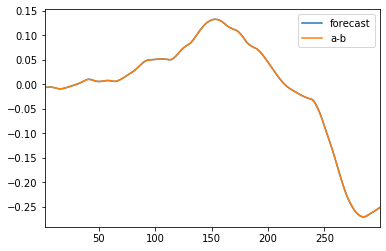

In [22]:
model_fit.plot_predict()

In [23]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([-0.25051958]), array([0.00022595]), array([[-0.25096244, -0.25007673]]))
